# Central Hidroeléctrica Yacyretá
## 05 - Naive Forecasting
### Fecha: 28-Dic-21

In [1]:
# Para que funcione más rápidamente el intellisense
#%config Completer.use_jedi = False

In [2]:
#Cargo numpy y pandas para trabajar con dataframes
import pandas as pd
import numpy as np
from datetime import date


import matplotlib.pyplot as plt
#rcParams["figure.figsize"] = 16, 4

In [3]:
# Imports necesarios para que funcione iplot() como método de pandas
%matplotlib inline
import plotly.graph_objs as go
from  plotly.offline import plot
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected='true')

In [4]:
# Planto una semilla para repetitibilidad
import random
random.seed(170162)
np.random.seed(170162)

In [5]:
# Especifico el nombre del archivo con el dataset unificado de la CHY y el path
path = './datasets/CHY/output/'
file_name = 'CHY_dataset.csv'

In [6]:
# Leo el dataset creado en el notebook anterior
df = pd.read_csv(path + file_name)

In [7]:
# Convierto la columna FECHA de object a datetime64
df['FECHA'] = pd.to_datetime(df['FECHA'])

In [8]:
# Hago que la columna FECHA sea el índice
df.set_index('FECHA', inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3833 entries, 2011-01-01 to 2021-06-30
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   COTA_EMBALSE      3833 non-null   float64
 1   COTA_RESTITUCION  3833 non-null   float64
 2   SALTO             3833 non-null   float64
 3   QAFLR             3833 non-null   float64
 4   QVBP              3833 non-null   float64
 5   QVBAC             3833 non-null   float64
 6   QTURB             3833 non-null   float64
 7   SINP              3833 non-null   float64
 8   SADI              3833 non-null   float64
dtypes: float64(9)
memory usage: 299.5 KB


In [10]:
df.index
# Veo que el índice no tiene frecuencia asidnada, aunque se ve claramente que es diaria

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
               '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28',
               '2021-06-29', '2021-06-30'],
              dtype='datetime64[ns]', name='FECHA', length=3833, freq=None)

In [11]:
# Le asigno frecuencia diaria
#df = df.asfreq('D')

# Si fuera necesario imputar NAN
df = df.asfreq('D', method='ffill') 

# Vuelvo a ver el índice
df

,COTA_EMBALSE,COTA_RESTITUCION,SALTO,QAFLR,QVBP,QVBAC,QTURB,SINP,SADI
FECHA,,,,,,,,,
2011-01-01,82.04,60.17,21.87,13936.0,0.0,1045.0,11977.0,5391.00,49384.000
2011-01-02,82.06,60.17,21.89,13267.0,0.0,1045.0,11863.0,5631.60,48785.000
2011-01-03,82.07,60.12,21.95,12670.0,0.0,1045.0,11439.0,6871.60,46573.000
2011-01-04,82.08,60.12,21.96,12909.0,0.0,1045.0,11505.0,7460.80,46046.000
2011-01-05,82.13,60.08,22.05,13787.0,0.0,1047.0,11455.0,6555.00,46721.000
...,...,...,...,...,...,...,...,...,...
2021-06-26,82.78,58.94,23.84,6545.0,0.0,1017.0,5157.0,4388.60,21594.112
2021-06-27,82.78,58.94,23.84,6337.0,0.0,1017.0,5135.0,4188.42,21658.536
2021-06-28,82.79,58.93,23.86,6138.0,0.0,1017.0,5121.0,5165.92,20606.040


In [12]:
# Creo la serie de tiempo DSALTO a partir de la columna SALTO del dataframe
SALTO = df['SALTO'].squeeze()

In [13]:
SALTO

FECHA
2011-01-01    21.87
2011-01-02    21.89
2011-01-03    21.95
2011-01-04    21.96
2011-01-05    22.05
              ...  
2021-06-26    23.84
2021-06-27    23.84
2021-06-28    23.86
2021-06-29    23.86
2021-06-30    23.89
Freq: D, Name: SALTO, Length: 3834, dtype: float64

<AxesSubplot:xlabel='FECHA'>

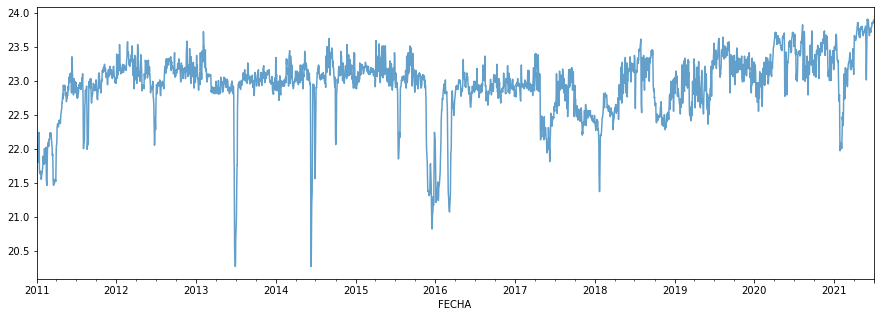

In [14]:
# Ploteo rápido de la variable SALTO
SALTO.plot(figsize=(15,5), alpha=0.7, label=True)

In [15]:
# Imprimo algunas estadísticas de SALTO, en particular la std
SALTO.describe()

count    3834.000000
mean       22.936473
std         0.464080
min        20.270000
25%        22.820000
50%        23.010000
75%        23.190000
max        23.900000
Name: SALTO, dtype: float64

### Persistence Model / Naive Forecasting

In [16]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split

%matplotlib inline

### Pronóstico a 7 días

In [17]:
# Predigo a 7 días
periodoPrediccion =7
SALTO_train, SALTO_test = temporal_train_test_split(SALTO, test_size=periodoPrediccion)

fh = ForecastingHorizon(SALTO_test.index, is_relative=False)

In [18]:
from sktime.performance_metrics.forecasting import MeanAbsoluteError, MeanSquaredError

In [19]:
mae = MeanAbsoluteError()
rmse = MeanSquaredError(square_root=True)

In [20]:
# para imprimir corerctamente diccionarios
import pprint

In [21]:
# Creo una lista para las métricas
error_metrics=[]

strategies = ['last', 'mean', 'drift']
for strategy in strategies:
    forecaster = NaiveForecaster(strategy=strategy, sp=7)
    forecaster.fit(SALTO_train)
    SALTO_pred = forecaster.predict(fh)
    
    # Calculo métricas
    error_metrics.append( { # métricas en centímetros 
                           'Estrategia': strategy, 
                           'MAE': mae(SALTO_test, SALTO_pred), 
                           #'MSE': mse(y_test, y_pred),
                           'RMSE': rmse(SALTO_test, SALTO_pred), 
                           #'MASE': mase(y_true=y_test, y_pred=y_pred, y_train=y_train)
                          }
                        ) 

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\forecasting\base\_fh.py:486: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\forecasting\base\_fh.py:496: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:65: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:66: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:68: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:71: FutureWarning:

Timestamp.freqstr is d

In [22]:
# Imprimo las métricas
for element in error_metrics:
        print('Estrategia:', element['Estrategia'], ', MAE:', f"{element['MAE']:0.4f}", 'm, ', 
              'RMSE:', f"{element['RMSE']:0.4f}", 'm')

Estrategia: last , MAE: 0.0800 m,  RMSE: 0.0878 m
Estrategia: mean , MAE: 0.9195 m,  RMSE: 0.9203 m
Estrategia: drift , MAE: 0.0123 m,  RMSE: 0.0161 m


In [23]:
# Convierto la lista de métricas en un dataframe
metrics_df = pd.DataFrame.from_dict(error_metrics) 

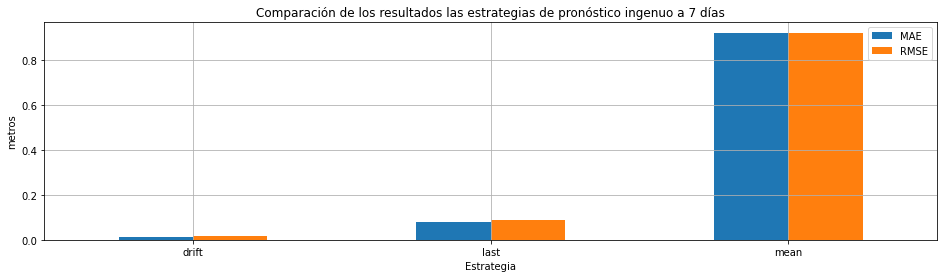

In [24]:
# Grafico una comparativa en diagrama de barras
ax = metrics_df.sort_values('MAE')[['Estrategia', 'MAE', 'RMSE']].plot(figsize=(16,4), grid=True, kind='bar', x='Estrategia', ylabel='metros', 
                                                                  title='Comparación de los resultados las estrategias de pronóstico ingenuo a ' + str(periodoPrediccion) + ' días')
ax.tick_params(axis='x', labelrotation = 0)


In [25]:
# Grafico una comparativa en diagrama de barras
metrics_df.sort_values('MAE')[['Estrategia', 'MAE', 'RMSE']].iplot(kind='bar', x='Estrategia', 
                                                                   keys=['MAE', 'RMSE'], 
                                                                   dimensions=(950, 350), 
                                                                   xTitle='Estrategia', yTitle='metros',
                                                                   title='Comparación de los resultados las estrategias de pronóstico ingenuo a ' + str(periodoPrediccion) + ' días')
#ax.tick_params(axis='x', labelrotation = 0)


C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:93: FutureWarning:

Timestamp.freq is deprecated and will be removed in a future version

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:95: FutureWarning:

Timestamp.freq is deprecated and will be removed in a future version

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\forecasting\base\_fh.py:486: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\forecasting\base\_fh.py:496: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:65: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:66: FutureWarning:

Timestamp.freqstr is deprecate

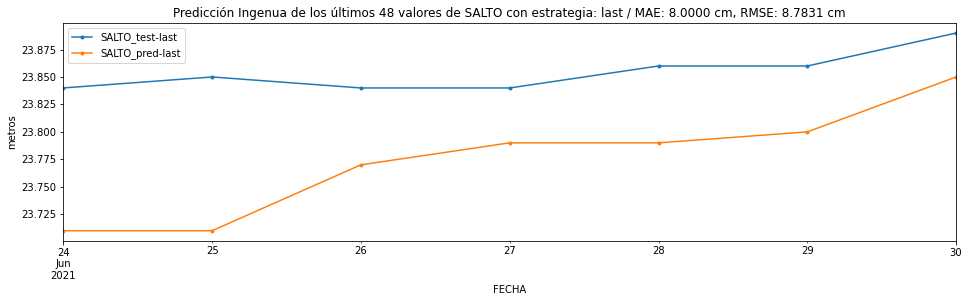

In [26]:
strategy = 'last'
# Defino el predictor
forecaster = NaiveForecaster(strategy=strategy, sp=7)

# Lo entreno 
forecaster.fit(SALTO_train)

# Predigo
SALTO_pred = forecaster.predict(fh)

# Ploteo SALTO_test y SALTO_pred
SALTO_test.plot(figsize=(16,4), style='.-', ylabel='metros', legend=True, label='SALTO_test-'+strategy, 
                title='Predicción Ingenua de los últimos 48 valores de SALTO con estrategia: '
                + strategy + ' / MAE: ' + f"{mae(SALTO_test, SALTO_pred)*100:.4f}" + ' cm, ' + 'RMSE: ' 
                + f"{rmse(SALTO_test, SALTO_pred)*100:.4f}" + ' cm')
SALTO_pred.plot(style='.-', legend=True, label='SALTO_pred-'+strategy);
    

In [27]:
# Ploteo los resultados
pd.concat([SALTO_test, SALTO_pred], keys=['SALTO_test', 'SALTO_pred'], axis=1).iplot(
    mode='lines+markers', size=5.0
    ,title='Pronóstico Ingenuo - Estrategia: "' + strategy  + '", '  + 'Horizonte: 7 días' \
    + ' / MAE: ' + f"{mae(SALTO_test, SALTO_pred):.4f}" + 'm, ' + 'RMSE: ' \
                + f"{rmse(SALTO_test, SALTO_pred):.4f}" + 'm'
    ,yTitle='metros'
    ,xTitle='Fecha'
    ,dimensions=(950, 300)
    )

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:93: FutureWarning:

Timestamp.freq is deprecated and will be removed in a future version

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:95: FutureWarning:

Timestamp.freq is deprecated and will be removed in a future version

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\forecasting\base\_fh.py:486: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\forecasting\base\_fh.py:496: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:65: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:66: FutureWarning:

Timestamp.freqstr is deprecate

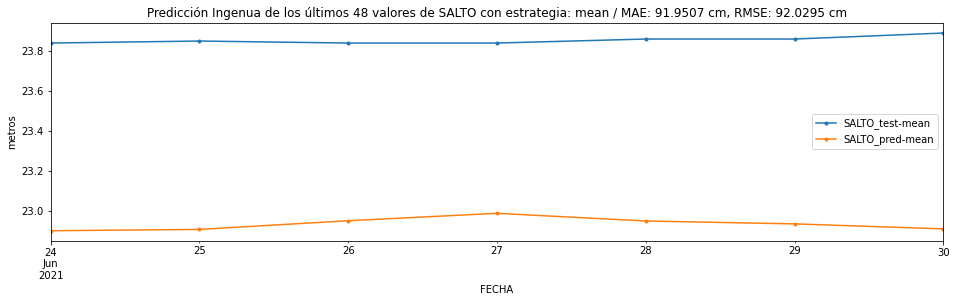

In [28]:
strategy = 'mean'
# Defino el predictor
forecaster = NaiveForecaster(strategy=strategy, sp=7)

# Lo entreno 
forecaster.fit(SALTO_train)

# Predigo
SALTO_pred = forecaster.predict(fh)

# Ploteo SALTO_test y SALTO_pred
SALTO_test.plot(figsize=(16,4), style='.-', legend=True, label='SALTO_test-'+strategy, ylabel='metros', 
                title='Predicción Ingenua de los últimos 48 valores de SALTO con estrategia: '+ strategy +
               ' / MAE: ' + f"{mae(SALTO_test, SALTO_pred)*100:.4f}" + ' cm, ' + 'RMSE: ' + f"{rmse(SALTO_test, SALTO_pred)*100:.4f}" + ' cm' )
SALTO_pred.plot(style='.-', legend=True, label='SALTO_pred-'+strategy);
    

In [29]:
# Ploteo los resultados
pd.concat([SALTO_test, SALTO_pred], keys=['SALTO_test', 'SALTO_pred'], axis=1).iplot(
    mode='lines+markers', size=5.0
    ,title='Pronóstico Ingenuo - Estrategia: "' + strategy  + '", '  + 'Horizonte: 7 días' \
    + ' / MAE: ' + f"{mae(SALTO_test, SALTO_pred):.4f}" + 'm, ' + 'RMSE: ' \
                + f"{rmse(SALTO_test, SALTO_pred):.4f}" + 'm'
    ,yTitle='metros'
    ,xTitle='Fecha'
    ,dimensions=(950, 300)
    )

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\forecasting\naive.py:78: UserWarning:

For the `drift` strategy, the `sp` value will be ignored.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:93: FutureWarning:

Timestamp.freq is deprecated and will be removed in a future version

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:95: FutureWarning:

Timestamp.freq is deprecated and will be removed in a future version

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\forecasting\base\_fh.py:486: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\forecasting\base\_fh.py:496: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:65: FutureWarning:

Timestamp.freqstr is deprecated and will be 

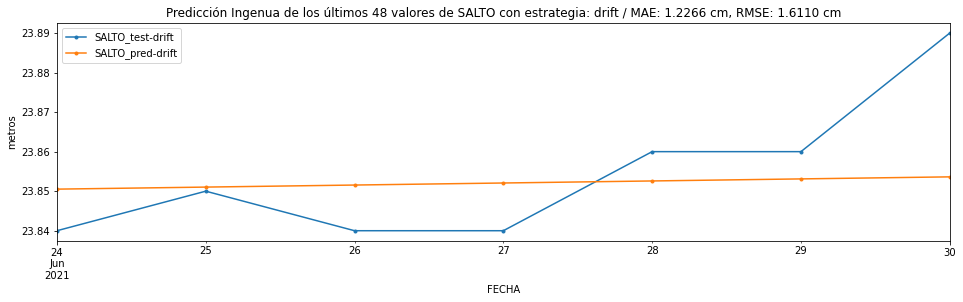

In [30]:
strategy = 'drift'
# Defino el predictor
forecaster = NaiveForecaster(strategy=strategy, sp=7)

# Lo entreno 
forecaster.fit(SALTO_train)

# Predigo
SALTO_pred = forecaster.predict(fh)

# Ploteo SALTO_test y SALTO_pred
SALTO_test.plot(figsize=(16,4), style='.-', legend=True, ylabel='metros', label='SALTO_test-'+strategy, 
                title='Predicción Ingenua de los últimos 48 valores de SALTO con estrategia: '
                + strategy + ' / MAE: ' + f"{mae(SALTO_test, SALTO_pred)*100:.4f}" + ' cm, ' + 'RMSE: ' 
                + f"{rmse(SALTO_test, SALTO_pred)*100:.4f}" + ' cm')
SALTO_pred.plot(style='.-', legend=True, label='SALTO_pred-'+strategy);
    

In [31]:
# Ploteo los resultados
pd.concat([SALTO_test, SALTO_pred], keys=['SALTO_test', 'SALTO_pred'], axis=1).iplot(
    mode='lines+markers', size=5.0
    ,title='Pronóstico Ingenuo - Estrategia: "' + strategy  + '", '  + 'Horizonte: 7 días' \
    + ' / MAE: ' + f"{mae(SALTO_test, SALTO_pred):.4f}" + 'm, ' + 'RMSE: ' \
                + f"{rmse(SALTO_test, SALTO_pred):.4f}" + 'm'
    ,yTitle='metros'
    ,xTitle='Fecha'
    ,dimensions=(950, 300)
    )

In [32]:
# Creo un dataframe para graficar las diferencias entre los valores reales y los pronosticados
df_test_pred = pd.DataFrame(columns=['SALTO_test', 'SALTO_pred', 'delta'], index=SALTO_test.index)
df_test_pred['SALTO_test'] = SALTO_test
df_test_pred['SALTO_pred'] = SALTO_pred
df_test_pred['delta'] = (df_test_pred['SALTO_test'] - df_test_pred['SALTO_pred'])

# Quito la parte de las horas al índice
df_test_pred.index = df_test_pred.index.date 

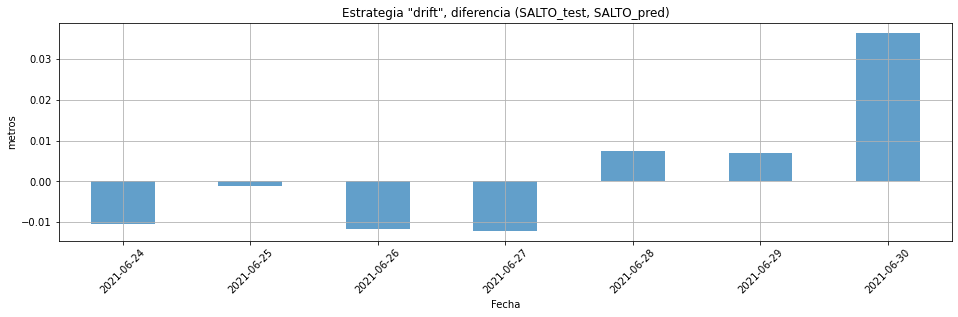

In [33]:
# Ploteo el diagrama de barras
ax = df_test_pred['delta'].plot(figsize=(16,4), alpha=0.7, grid=True, kind='bar',  ylabel='metros', 
                           xlabel='Fecha', title='Estrategia "drift", diferencia (SALTO_test, SALTO_pred)')
ax.tick_params(axis='x', labelrotation = 45)

In [34]:
df_test_pred

,SALTO_test,SALTO_pred,delta
2021-06-24,23.84,23.850518,-0.010518
2021-06-25,23.85,23.851035,-0.001035
2021-06-26,23.84,23.851553,-0.011553
2021-06-27,23.84,23.852070,-0.012070
2021-06-28,23.86,23.852588,0.007412
2021-06-29,23.86,23.853105,0.006895
2021-06-30,23.89,23.853623,0.036377


In [35]:
# Ploteo los resultados
df_test_pred.iplot(kind='bar'
                   ,keys=['delta']
                   ,dimensions=(950, 300)
                   ,xTitle='Fecha'
                   ,yTitle='metros'
                   ,title='Pronostico Ingenuo a 7 días - Estrategia "drift", diferencia (SALTO_test, SALTO_pred)'
                  )


### Pronóstico a 56 días

In [36]:
# Predigo a 56 días
periodoPrediccion = 56
SALTO_train, SALTO_test = temporal_train_test_split(SALTO, test_size=periodoPrediccion)

fh = ForecastingHorizon(SALTO_test.index, is_relative=False)

In [37]:
from sktime.performance_metrics.forecasting import MeanAbsoluteError, MeanSquaredError

In [38]:
mae = MeanAbsoluteError()
rmse = MeanSquaredError(square_root=True)

In [39]:
# para imprimir corerctamente diccionarios
import pprint

In [40]:
# Creo una lista para las métricas
error_metrics=[]

strategies = ['last', 'mean', 'drift']
for strategy in strategies:
    forecaster = NaiveForecaster(strategy=strategy, sp=7)
    forecaster.fit(SALTO_train)
    SALTO_pred = forecaster.predict(fh)
    
    # Calculo métricas
    error_metrics.append( { # métricas en centímetros 
                           'Estrategia': strategy, 
                           'MAE': mae(SALTO_test, SALTO_pred), 
                           #'MSE': mse(y_test, y_pred),
                           'RMSE': rmse(SALTO_test, SALTO_pred), 
                           #'MASE': mase(y_true=y_test, y_pred=y_pred, y_train=y_train)
                          }
                        ) 

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\forecasting\base\_fh.py:486: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\forecasting\base\_fh.py:496: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:65: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:66: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:68: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:71: FutureWarning:

Timestamp.freqstr is d

In [41]:
# Imprimo las métricas
for element in error_metrics:
        print('Estrategia:', element['Estrategia'], ', MAE:', f"{element['MAE']:0.4f}", 'm, ', 
              'RMSE:', f"{element['RMSE']:0.4f}", 'm')

Estrategia: last , MAE: 0.0973 m,  RMSE: 0.1644 m
Estrategia: mean , MAE: 0.8073 m,  RMSE: 0.8238 m
Estrategia: drift , MAE: 0.0967 m,  RMSE: 0.1755 m


In [42]:
# Convierto la lista de métricas en un dataframe
metrics_df = pd.DataFrame.from_dict(error_metrics) 

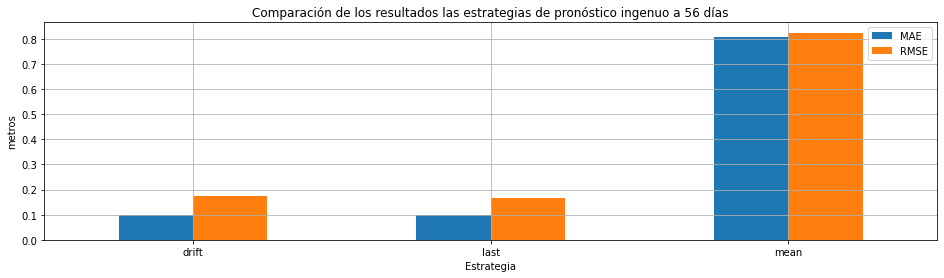

In [43]:
# Grafico una comparativa en diagrama de barras
ax = metrics_df.sort_values('MAE')[['Estrategia', 'MAE', 'RMSE']].plot(figsize=(16,4), grid=True, kind='bar', x='Estrategia', ylabel='metros', 
                                                                  title='Comparación de los resultados las estrategias de pronóstico ingenuo a ' + str(periodoPrediccion) + ' días')
ax.tick_params(axis='x', labelrotation = 0)


In [44]:
# Grafico una comparativa en diagrama de barras
metrics_df.sort_values('MAE')[['Estrategia', 'MAE', 'RMSE']].iplot(kind='bar', x='Estrategia', 
                                                                   keys=['MAE', 'RMSE'], 
                                                                   dimensions=(950, 350), 
                                                                   xTitle='Estrategia', yTitle='metros',
                                                                   title='Comparación de los resultados las estrategias de pronóstico ingenuo a ' + str(periodoPrediccion) + ' días')
#ax.tick_params(axis='x', labelrotation = 0)


C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:93: FutureWarning:

Timestamp.freq is deprecated and will be removed in a future version

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:95: FutureWarning:

Timestamp.freq is deprecated and will be removed in a future version

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\forecasting\base\_fh.py:486: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\forecasting\base\_fh.py:496: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:65: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:66: FutureWarning:

Timestamp.freqstr is deprecate

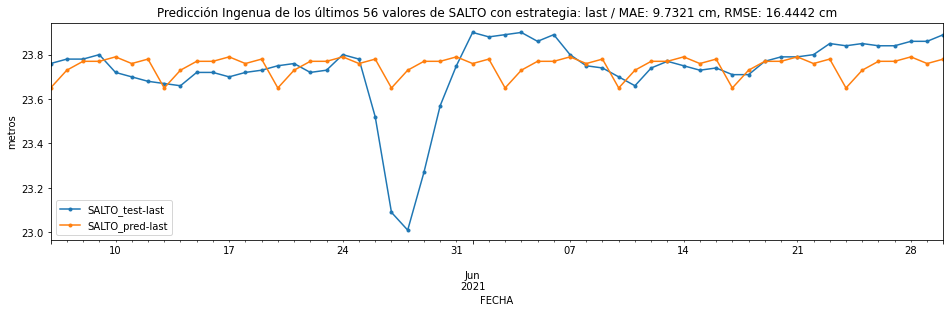

In [45]:
strategy = 'last'
# Defino el predictor
forecaster = NaiveForecaster(strategy=strategy, sp=7)

# Lo entreno 
forecaster.fit(SALTO_train)

# Predigo
SALTO_pred = forecaster.predict(fh)

# Ploteo SALTO_test y SALTO_pred
SALTO_test.plot(figsize=(16,4), style='.-', ylabel='metros', legend=True, label='SALTO_test-'+strategy, 
                title='Predicción Ingenua de los últimos 56 valores de SALTO con estrategia: '
                + strategy + ' / MAE: ' + f"{mae(SALTO_test, SALTO_pred)*100:.4f}" + ' cm, ' + 'RMSE: ' 
                + f"{rmse(SALTO_test, SALTO_pred)*100:.4f}" + ' cm')
SALTO_pred.plot(style='.-', legend=True, label='SALTO_pred-'+strategy);
    

In [46]:
# Ploteo los resultados
pd.concat([SALTO_test, SALTO_pred], keys=['SALTO_test', 'SALTO_pred'], axis=1).iplot(
    mode='lines+markers', size=5.0
    ,title='Pronóstico Ingenuo - Estrategia: "' + strategy  + '", '  + 'Horizonte: 56 días' \
    + ' / MAE: ' + f"{mae(SALTO_test, SALTO_pred):.4f}" + 'm, ' + 'RMSE: ' \
                + f"{rmse(SALTO_test, SALTO_pred):.4f}" + 'm'
    ,yTitle='metros'
    ,xTitle='Fecha'
    ,dimensions=(950, 300)
    )

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:93: FutureWarning:

Timestamp.freq is deprecated and will be removed in a future version

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:95: FutureWarning:

Timestamp.freq is deprecated and will be removed in a future version

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\forecasting\base\_fh.py:486: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\forecasting\base\_fh.py:496: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:65: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:66: FutureWarning:

Timestamp.freqstr is deprecate

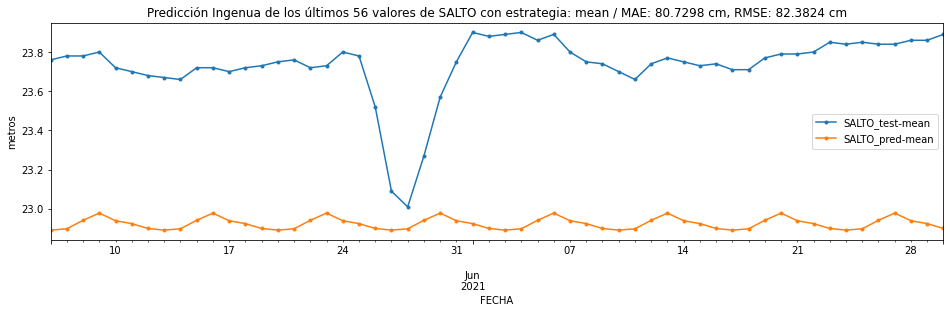

In [47]:
strategy = 'mean'
# Defino el predictor
forecaster = NaiveForecaster(strategy=strategy, sp=7)

# Lo entreno 
forecaster.fit(SALTO_train)

# Predigo
SALTO_pred = forecaster.predict(fh)

# Ploteo SALTO_test y SALTO_pred
SALTO_test.plot(figsize=(16,4), style='.-', legend=True, label='SALTO_test-'+strategy, ylabel='metros', 
                title='Predicción Ingenua de los últimos 56 valores de SALTO con estrategia: '+ strategy +
               ' / MAE: ' + f"{mae(SALTO_test, SALTO_pred)*100:.4f}" + ' cm, ' + 'RMSE: ' + f"{rmse(SALTO_test, SALTO_pred)*100:.4f}" + ' cm' )
SALTO_pred.plot(style='.-', legend=True, label='SALTO_pred-'+strategy);
    

In [48]:
# Ploteo los resultados
pd.concat([SALTO_test, SALTO_pred], keys=['SALTO_test', 'SALTO_pred'], axis=1).iplot(
    mode='lines+markers', size=5.0
    ,title='Pronóstico Ingenuo - Estrategia: "' + strategy  + '", '  + 'Horizonte: 56 días' \
    + ' / MAE: ' + f"{mae(SALTO_test, SALTO_pred):.4f}" + 'm, ' + 'RMSE: ' \
                + f"{rmse(SALTO_test, SALTO_pred):.4f}" + 'm'
    ,yTitle='metros'
    ,xTitle='Fecha'
    ,dimensions=(950, 300)
    )

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\forecasting\naive.py:78: UserWarning:

For the `drift` strategy, the `sp` value will be ignored.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:93: FutureWarning:

Timestamp.freq is deprecated and will be removed in a future version

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:95: FutureWarning:

Timestamp.freq is deprecated and will be removed in a future version

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\forecasting\base\_fh.py:486: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\forecasting\base\_fh.py:496: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.

C:\Users\josel\anaconda3\envs\tesis\lib\site-packages\sktime\utils\datetime.py:65: FutureWarning:

Timestamp.freqstr is deprecated and will be 

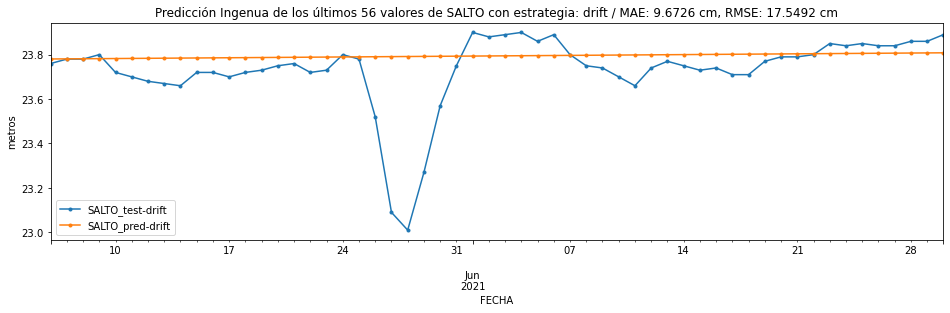

In [49]:
strategy = 'drift'
# Defino el predictor
forecaster = NaiveForecaster(strategy=strategy, sp=7)

# Lo entreno 
forecaster.fit(SALTO_train)

# Predigo
SALTO_pred = forecaster.predict(fh)

# Ploteo SALTO_test y SALTO_pred
SALTO_test.plot(figsize=(16,4), style='.-', legend=True, ylabel='metros', label='SALTO_test-'+strategy, 
                title='Predicción Ingenua de los últimos 56 valores de SALTO con estrategia: '
                + strategy + ' / MAE: ' + f"{mae(SALTO_test, SALTO_pred)*100:.4f}" + ' cm, ' + 'RMSE: ' 
                + f"{rmse(SALTO_test, SALTO_pred)*100:.4f}" + ' cm')
SALTO_pred.plot(style='.-', legend=True, label='SALTO_pred-'+strategy);
    

In [50]:
# Ploteo los resultados
pd.concat([SALTO_test, SALTO_pred], keys=['SALTO_test', 'SALTO_pred'], axis=1).iplot(
    mode='lines+markers', size=5.0
    ,title='Pronóstico Ingenuo - Estrategia: "' + strategy  + '", '  + 'Horizonte: 56 días' \
    + ' / MAE: ' + f"{mae(SALTO_test, SALTO_pred):.4f}" + 'm, ' + 'RMSE: ' \
                + f"{rmse(SALTO_test, SALTO_pred):.4f}" + 'm'
    ,yTitle='metros'
    ,xTitle='Fecha'
    ,dimensions=(950, 300)
    )

In [51]:
# Creo un dataframe para graficar las diferencias entre los valores reales y los pronosticados
df_test_pred = pd.DataFrame(columns=['SALTO_test', 'SALTO_pred', 'delta'], index=SALTO_test.index)
df_test_pred['SALTO_test'] = SALTO_test
df_test_pred['SALTO_pred'] = SALTO_pred
df_test_pred['delta'] = (df_test_pred['SALTO_test'] - df_test_pred['SALTO_pred'])

# Quito la parte de las horas al índice
df_test_pred.index = df_test_pred.index.date 

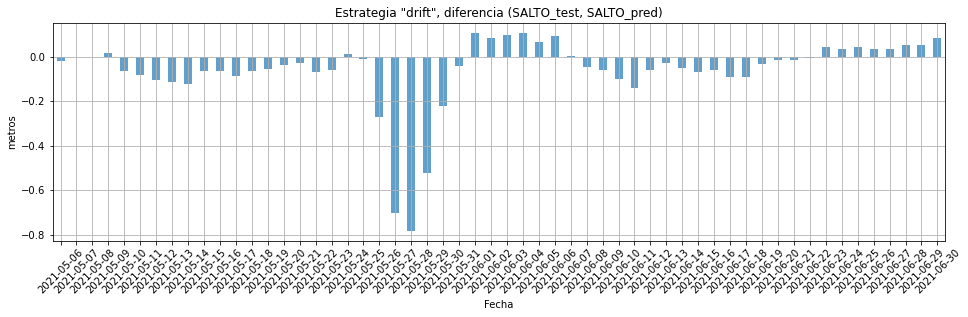

In [52]:
# Ploteo el diagrama de barras
ax = df_test_pred['delta'].plot(figsize=(16,4), alpha=0.7, grid=True, kind='bar',  ylabel='metros', 
                           xlabel='Fecha', title='Estrategia "drift", diferencia (SALTO_test, SALTO_pred)')
ax.tick_params(axis='x', labelrotation = 45)

In [53]:
df_test_pred

,SALTO_test,SALTO_pred,delta
2021-05-06,23.76,23.780506,-0.020506
2021-05-07,23.78,23.781011,-0.001011
2021-05-08,23.78,23.781517,-0.001517
2021-05-09,23.80,23.782023,0.017977
2021-05-10,23.72,23.782528,-0.062528
2021-05-11,23.70,23.783034,-0.083034
2021-05-12,23.68,23.783540,-0.103540
2021-05-13,23.67,23.784046,-0.114046
2021-05-14,23.66,23.784551,-0.124551
2021-05-15,23.72,23.785057,-0.065057


In [60]:
# Ploteo los resultados
df_test_pred.iplot(kind='bar'
                   ,keys=['delta']
                   ,color=['lightblue']
                   ,dimensions=(950, 300)
                   ,xTitle='Fecha'
                   ,yTitle='metros'
                   ,title='Pronostico Ingenuo a 56 días - Estrategia "drift", diferencia (SALTO_test, SALTO_pred)'
                  )


# ¡Fin del Notebook!